In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#202331035_Nadila Kusuma Dewi

(1276, 1280)


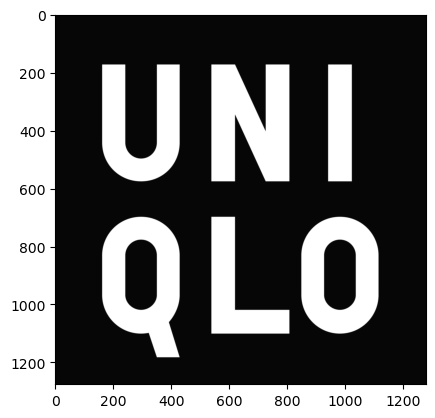

In [3]:
citra_b = cv2.imread("uniqlo.png")
citra_b = cv2.cvtColor(citra_b,cv2.COLOR_BGR2GRAY)    #buat ganti warna(ngambil warnanya trus algooritmanya)
print(citra_b.shape)

plt.imshow(citra_b, cmap = "gray")
#202331035_Nadila Kusuma Dewi

In [5]:
kernel = np.array([[-1, 0, -1],[0, 4, 0],[-1, 0, -1],])
#202331035_Nadila Kusuma Dewi

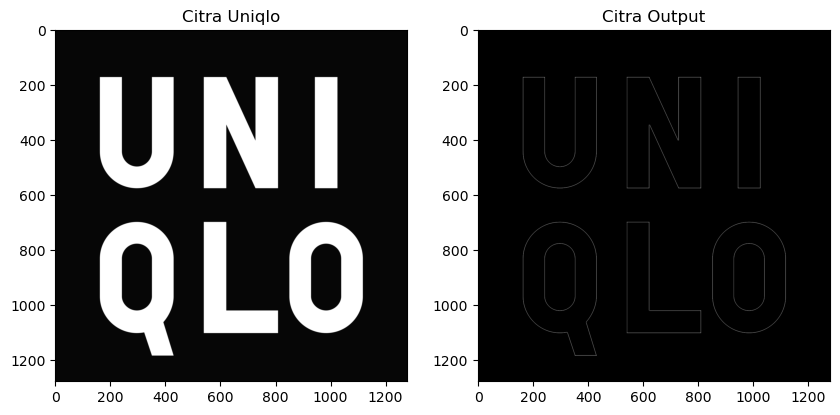

In [7]:
citraOutput = cv2.filter2D(citra_b, -1, kernel) #filter2D buat konvolusi (-1 itu format gambarnya)

fig, axs = plt.subplots(1, 2, figsize = (10,10)) #fig, axs untuk ngasi gambar lebih dari satu gambar - subplots
ax = axs.ravel()
#202331035_Nadila Kusuma Dewi
ax[0].imshow(citra_b, cmap = "gray")
ax[0].set_title("Citra Uniqlo")

ax[1].imshow(citraOutput, cmap = "gray")
ax[1].set_title("Citra Output")
#202331035_Nadila Kusuma Dewi
plt.show() #kalo gaada masi bisa jalan, cuman biar gada penjelasan" (biar bersih)

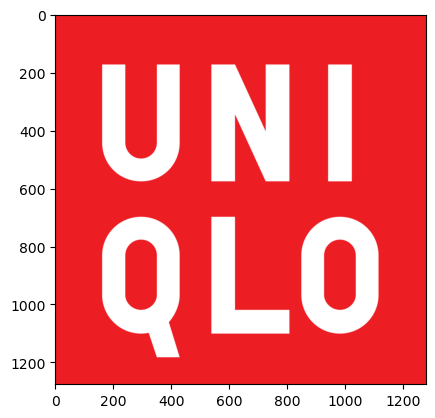

In [11]:
citra_r = cv2.imread("uniqlo.png")
citra_r = cv2.cvtColor(citra_r,cv2.COLOR_BGR2RGB)

plt.imshow(citra_r)
plt.show()
#202331035_Nadila Kusuma Dewi

In [13]:
from skimage.util import random_noise #ngambil library, random nooise utnuk ngasi noise atau titik"
#202331035_Nadila Kusuma Dewi

In [45]:
noise_img_snp = random_noise(citra_r, mode = "s&p", amount = 0.2)         # setiap mode punya parameter sendiri

noise_img_gaussian = random_noise(citra_r, mode = "gaussian", mean = 0, var = 0.01)

noise_img_speckle = random_noise(citra_r, mode = "speckle")
#202331035_Nadila Kusuma Dewi
noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8') #karna plot, 
                                                            #makanya dikali 255 karena 8 bit 0 - 255, 
                                                            #dikali 255 biar pas diubah ke 8 bit dia keubah menjadi 
                                                           #seakan akan menjadi perspektif 8 bit kalo ga lakuin ini bakal error
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype = 'uint8') 
noise_img_speckle = np.array(255*noise_img_speckle, dtype = 'uint8')

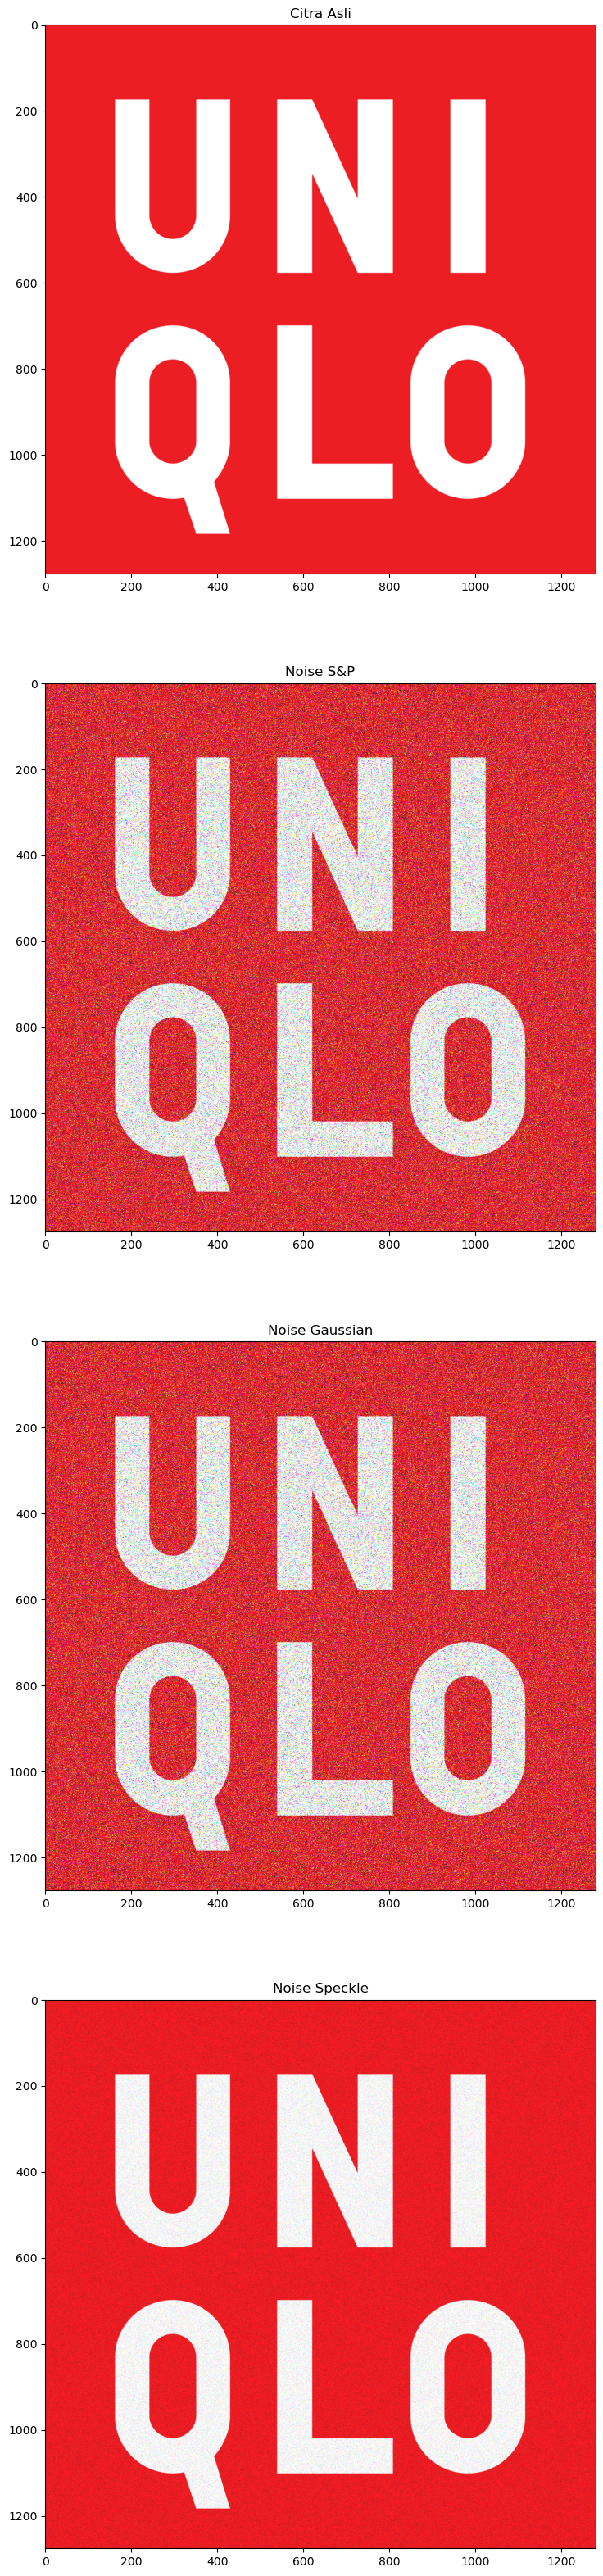

In [47]:
fig, axs = plt.subplots(4,1, figsize = (10, 40)) #nampilin gambar 4 baris 1 kolom
ax = axs.ravel()

ax[0].imshow(citra_r, cmap = "gray")
ax[0].set_title('Citra Asli')

ax[1].imshow(noise_img_snp, cmap = "gray")
ax[1].set_title('Noise S&P')
#202331035_Nadila Kusuma Dewi
ax[2].imshow(noise_img_snp, cmap = "gray")
ax[2].set_title('Noise Gaussian')

ax[3].imshow(noise_img_speckle, cmap = "gray")
ax[3].set_title('Noise Speckle')

plt.show()

In [19]:
kernel_3_3 = np.ones((3, 3), np.float32)/9 #buat kernel seperti mobil langsung make .ones.  ini dia buat matrik langsung 
#202331035_Nadila Kusuma Dewi

In [21]:
img_snp_avg_filter = cv2.filter2D(noise_img_snp, cv2.CV_8U, kernel_3_3, (-1, -1), delta = 0, borderType = cv2.BORDER_DEFAULT)
                                                                        #-1, -1 ini default, delta buat ngatur kecerahannya, 
                                                                        # bordertype biar gada data ga loss
img_snp_median_filter = cv2.medianBlur(noise_img_snp, 3) #median blur itu fungsi, ini dia nyari nilai median dari tetangganya
#202331035_Nadila Kusuma Dewi

In [23]:
img_gaussian_avg_filter = cv2.filter2D(noise_img_gaussian, cv2.CV_8U, kernel_3_3, (-1, -1), delta = 0, borderType = cv2.BORDER_DEFAULT)

img_gaussian_median_filter = cv2.medianBlur(noise_img_gaussian, 3)
#202331035_Nadila Kusuma Dewi

In [25]:
img_speckle_avg_filter = cv2.filter2D(noise_img_speckle, cv2.CV_8U, kernel_3_3, (-1, -1), delta = 0, borderType = cv2.BORDER_DEFAULT)

img_speckle_median_filter = cv2.medianBlur(noise_img_speckle, 3)
#202331035_Nadila Kusuma Dewi

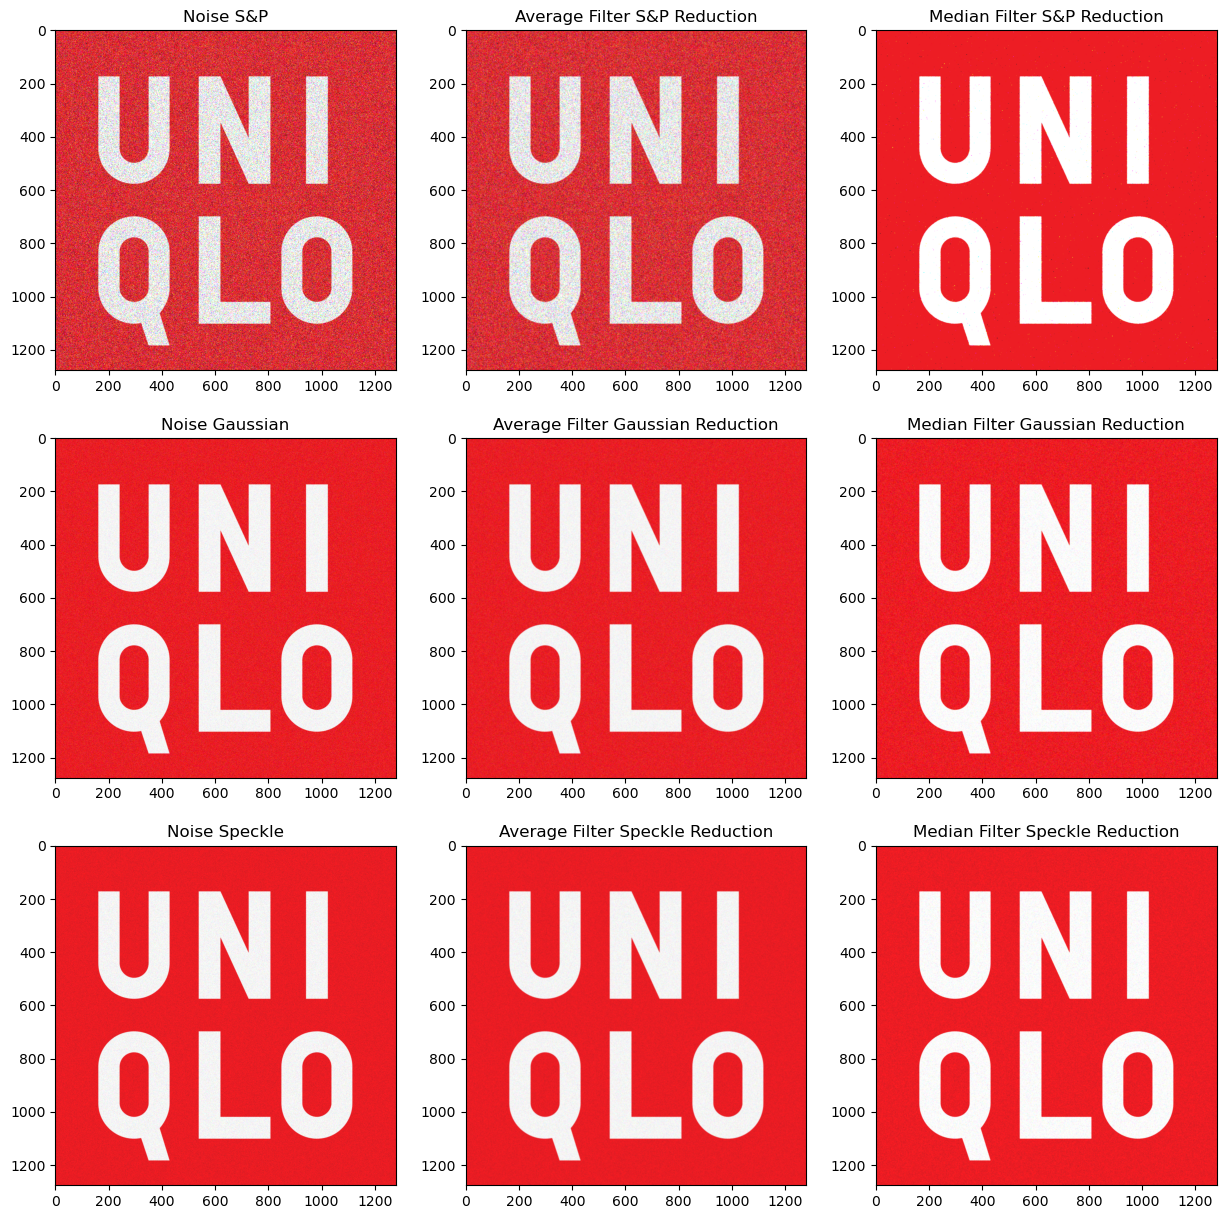

In [27]:
fig, axs = plt.subplots(3, 3, figsize = (15, 15)) # ini semua buat nampilin output
ax = axs.ravel()

ax[0].imshow(noise_img_snp, cmap = "gray")
ax[0].set_title('Noise S&P')

ax[1].imshow(img_snp_avg_filter, cmap = "gray") #202331035_Nadila Kusuma Dewi
ax[1].set_title('Average Filter S&P Reduction')

ax[2].imshow(img_snp_median_filter, cmap = "gray")
ax[2].set_title('Median Filter S&P Reduction')

ax[3].imshow(noise_img_gaussian, cmap = "gray")
ax[3].set_title('Noise Gaussian') #202331035_Nadila Kusuma Dewi

ax[4].imshow(img_gaussian_avg_filter, cmap = "gray")
ax[4].set_title('Average Filter Gaussian Reduction')

ax[5].imshow(img_gaussian_median_filter, cmap = "gray")
ax[5].set_title('Median Filter Gaussian Reduction')

ax[6].imshow(noise_img_speckle, cmap = "gray")
ax[6].set_title('Noise Speckle')#202331035_Nadila Kusuma Dewi

ax[7].imshow(img_speckle_avg_filter, cmap = "gray")
ax[7].set_title('Average Filter Speckle Reduction')

ax[8].imshow(img_speckle_median_filter, cmap = "gray")
ax[8].set_title('Median Filter Speckle Reduction')#202331035_Nadila Kusuma Dewi

plt.show()#202331035_Nadila Kusuma Dewi

In [29]:
citra_m = cv2.imread("uniqlo.png") #masukin gambar
citra_m = cv2.cvtColor(citra_m, cv2.COLOR_BGR2GRAY) #nampilin gambar (trus convert gambarnya)
#202331035_Nadila Kusuma Dewi

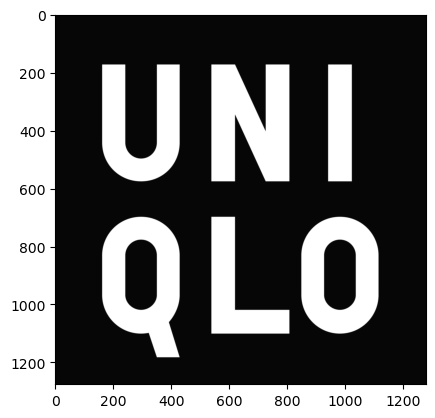

In [31]:
plt.imshow(citra_m, cmap = "gray")
#202331035_Nadila Kusuma Dewi

In [33]:
copyCitra1 = citra_m.copy().astype(float)

m1, n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

print("Shape copy citra 1 : ", copyCitra1.shape)
print("Shape output citra 1 : ", output1.shape)
#202331035_Nadila Kusuma Dewi
print("m1 : ", m1)
print("n1 : ", n1)

print()

Shape copy citra 1 :  (1276, 1280)
Shape output citra 1 :  (1276, 1280)
m1 :  1276
n1 :  1280



In [35]:
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        jumlah = copyCitra1[a1-1, b1-1] + copyCitra1[a1-1, b1] + copyCitra1[a1-1, b1+1] +\
        copyCitra1[a1, b1-1] + copyCitra1[a1, b1] + copyCitra1[a1, b1+1] +\
        copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1]
        output1[a1, b1] = (1/9 * jumlah)
#202331035_Nadila Kusuma Dewi
output1 = np.asarray(output1, dtype = np.uint8)

Text(0.5, 1.0, 'Input Citra 2')

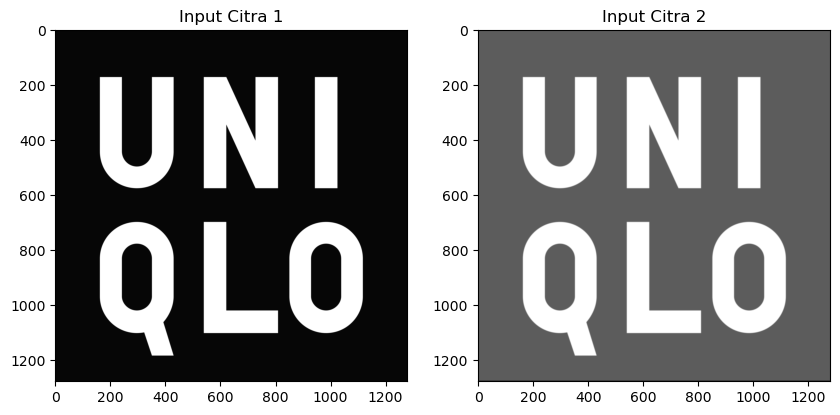

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(citra_m, cmap = "gray")
ax[0].set_title('Input Citra 1')
#202331035_Nadila Kusuma Dewi
ax[1].imshow(output1, cmap = "gray")
ax[1].set_title('Input Citra 2')

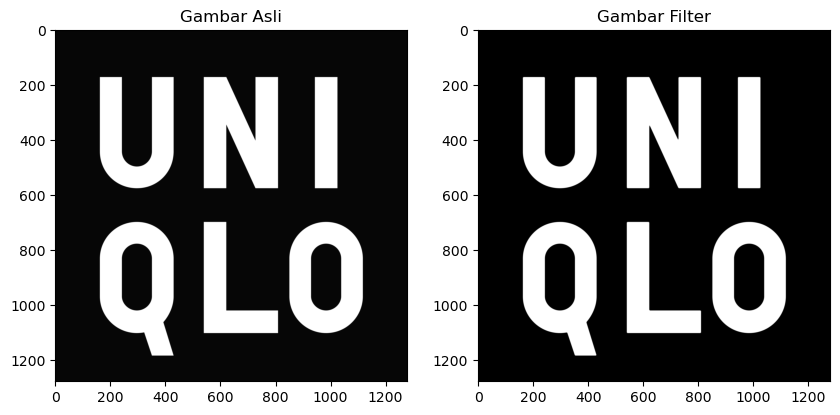

In [39]:
#membuat Filter median

citra_m2 = citra_m
img_median = citra_m2.copy()
img_median_after = cv2.medianBlur(img_median, 5) #kita make 5 berarti 5x5

fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()
#202331035_Nadila Kusuma Dewi
ax[0].imshow(img_median, cmap = "gray")
ax[0].set_title("Gambar Asli")
#202331035_Nadila Kusuma Dewi
ax[1].imshow(img_median_after, cmap = "gray")
ax[1].set_title("Gambar Filter")

plt.show()

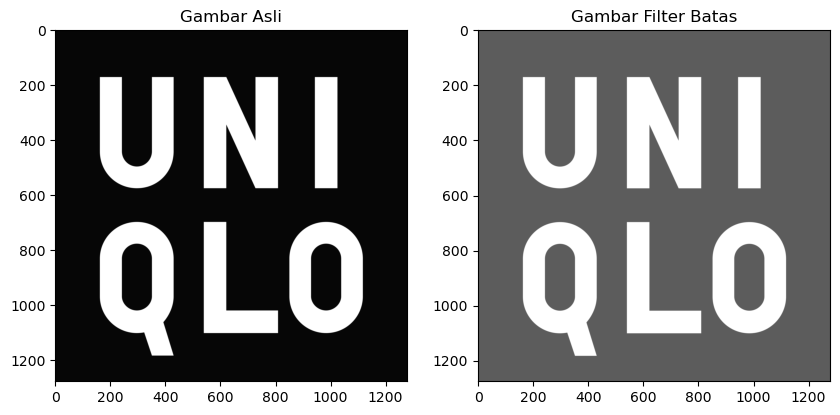

In [41]:
#Membuat citra batas
citra_m3 = citra_m
copyCitra3 = citra_m3.copy().astype(float)

m1, n1 = copyCitra3.shape
output3 = np.empty([m1-1, n1-1])
#202331035_Nadila Kusuma Dewi
for baris in range(1, m1-1):
    for kolom in range(1, n1-1):
        a1 = baris
        b1 = kolom
        arr = np.array([copyCitra3[a1-1, b1-1], copyCitra3[a1-1, b1], copyCitra3[a1-1, b1+1], 
                        copyCitra3[a1, b1-1], copyCitra3[a1, b1+1], copyCitra3[a1+1, b1-1], 
                        copyCitra3[a1+1, b1], copyCitra3[a1+1, b1+1]])
        minPiksel = np.amin(arr)
        maxPiksel = np.amax(arr)
        if (copyCitra3[baris, kolom] < minPiksel):
            output3[baris, kolom] = minPiksel
        else : #202331035_Nadila Kusuma Dewi
            if (copyCitra3[baris,kolom] > maxPiksel):
                output3[baris, kolom] = maxPiksel
            else :
                output3[baris,kolom] = copyCitra3[baris,kolom]
output3 = np.asarray(output3, dtype=np.uint8)

fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(citra_m3, cmap="gray") #202331035_Nadila Kusuma Dewi
ax[0].set_title("Gambar Asli")

ax[1].imshow(output3, cmap="gray")
ax[1].set_title("Gambar Filter Batas")

plt.show()#202331035_Nadila Kusuma Dewi